## Comparison of Performance Indices among experiments

This notebooks provide a minimum comparison for the Deliverable to provide an analysis of the Global PI of the NextGEMS runs. 

In [17]:
import os
from glob import glob
from aqua.util import load_yaml
import pandas as pd
import matplotlib.pyplot as plt
import ecmean
ececonfig = load_yaml('../config/ecmean_config.yml')
tabdir = ececonfig['dirs']['tab']
explist = ['ngc2009', 'ngc3028', 'tco1279-orca025', 'tco1279-orca025-cycle3', 'tco2559-ng5', 'tco2559-ng5-cycle3']
kol = ['palegreen', 'forestgreen', 'gold', 'goldenrod', 'dodgerblue', 'darkblue']
vars = ['tas', 'pr', 'psl', 'ua', 'ta', 'va', 'tos', 'sos', 'siconc']
climfile = os.path.join(os.path.dirname(ecmean.__file__), 'climatology/EC23/pi_climatology_EC23.yml')
clim = load_yaml(climfile)


Conver the yaml from dictionaries to panda dataframes and select only the global field for yearly averages

In [18]:
from ecmean.libs.general import dict_to_dataframe
tabs = {}
for exp in explist:
    file = glob(os.path.join(tabdir,'*'+exp+'*.yml'))[0]
    pippo = dict_to_dataframe(load_yaml(file))['ALL'].loc[vars, 'Global']
    for var in vars:
        pippo[var] = pippo[var]/clim[var]['cmip6']['ALL']['Global']
        pippo.rename(index = {var: clim[var]['longname']}, inplace = True)
    tabs[exp] = pippo


In [19]:
pd.DataFrame(tabs)


,ngc2009,ngc3028,tco1279-orca025,tco1279-orca025-cycle3,tco2559-ng5,tco2559-ng5-cycle3
2m Temperature (land-only),0.986378,1.318824,0.518450,0.438758,1.018351,0.525559
Precipitation,0.999732,0.848059,0.402008,0.267068,0.728782,0.461580
Mean Sea Level Pressure,0.598535,0.361675,0.162724,0.130852,0.353657,0.173513
Zonal Wind,NaN,NaN,0.234683,0.102752,0.220405,0.158567
Air Temperature,NaN,NaN,0.156120,0.130112,0.266876,0.165747
Meridional Wind,NaN,NaN,0.258529,0.112307,0.250185,0.222461
Sea Surface Temperature,NaN,0.620641,0.473784,0.594855,0.669573,0.440508
Sea Surface Salinity,NaN,0.216712,NaN,NaN,0.126517,0.088037
Sea-ice Concentration,0.471920,0.500653,0.385503,0.545059,0.962342,0.321942


Plot the bars, normalized

Text(0.5, 0, 'Normalized PI')

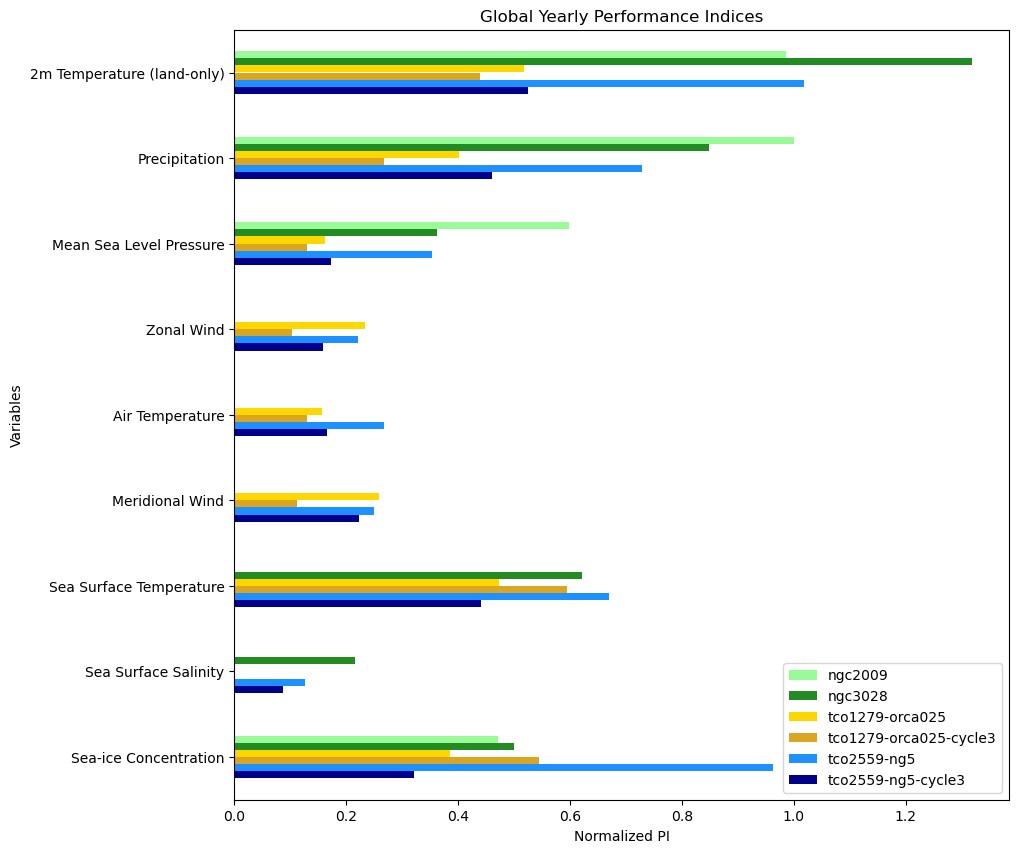

In [20]:
pd.DataFrame(tabs).plot(kind="barh", color=kol, figsize=(10,10))
plt.title("Global Yearly Performance Indices")
plt.gca().invert_yaxis()
plt.ylabel("Variables")
plt.xlabel("Normalized PI")